In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import data
file_confirmed='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
file_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
file_recovered='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirmed=pd.read_csv(file_confirmed)
df_deaths=pd.read_csv(file_deaths)
df_recovered=pd.read_csv(file_recovered)

In [3]:
# deaths pro capita
df_deceduti=df_deaths.iloc[:,[1,-1]]
df_deceduti.columns=['Nome','Totale_morti']
df_deceduti=df_deceduti.groupby('Nome').sum()

df_deceduti.head()

,Totale_morti
Nome,
Afghanistan,491
Albania,37
Algeria,788
Andorra,52
Angola,6


In [4]:
# population

dict_pop={'US':382*10**6,'United Kingdom':66.65*10**6,'Brazil':209.5*10**6,'Italy':60.36*10**6,'France':66.99*10**6,
               'Spain':46.94*10**6,'Mexico':126.2*10**6,'Belgium':11.46*10**6,'Germany':83.02*10**6,'Iran':81.8*10**6,'India':1353*10**6,
         'Russia':144.5*10**6,'Netherlands':17.28*10**6,'Peru':31.99*10**6,'Canada':37.59*10**6,'Turkey':82*10**6,'Sweden':10.23*10**6,'China':1393*10**6,'Ecuador':17.08*10**6,
         'Chile':18.73*10**6,'Pakistan':212.2*10**6,'Switzerland':8.57*10**6,'Indonesia':267.7*10**6,'Ireland':4.9*10**6,'Portugal':10.28*10**6,'Colombia':49.65*10**6,
         'Romania':19.41*10**6,'Egypt':98.42*10**6,'Poland':37.97*10**6,'South Africa':57.78*10**6,'Philippines':106.7*10**6,'Bangladesh':161.4*10**6,'Japan':126.5*10**6,
         'Ukraine':41.98*10**6,'Saudi Arabia':33.7*10**6,'Algeria':42.23*10**6,'Argentina':44.49*10**6,'Austria':8.859*10**6,'Denmark':5.806*10**6,
         'Hungary':9.773*10**6,'Dominican Republic':10.63*10**6,'Bolivia':11.35*10**6,'Panama':4.177*10**6,'Iraq':38.43*10**6,'Sudan':41.8*10**6,'Afghanistan':37.17*10**6,'Moldova':3.546*10**6,'Nigeria':195.9*10**6,'Czechia':10.69*10**6,
         'Australia':24.99*10**6,'Finland':5.518*10**6,'Greece':10.72*10**6,'Iceland':364134,'Korea, South':51.64*10**6,
         'Luxembourg':613894,'New Zealand':4.886*10**6,'Norway':5.368*10**6,'Slovakia':5.458*10**6,'Estonia':1.329*10**6,
         'Israel':8.884*10**6,'Lithuania':2.794*10**6,'Slovenia':2.081*10**6,'Latvia':1.92*10**6,'Costa Rica':5*10**6}

df_population=pd.Series(dict_pop).to_frame()

df_population.head()

,0
US,382000000.0
United Kingdom,66650000.0
Brazil,209500000.0
Italy,60360000.0
France,66990000.0


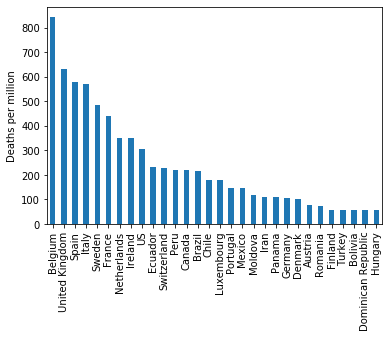

In [5]:
# deaths per million of people

df_complete=df_deceduti.join(df_population,on=df_deceduti.index)
df_complete.columns=['Totale_morti','Totale_popolazione']
df_complete['Deaths_per_million']=df_complete['Totale_morti']/df_complete['Totale_popolazione']*10**6
df_complete=df_complete.sort_values(by='Deaths_per_million',ascending=False)

df_complete['Deaths_per_million'].head(30).plot(kind='bar')
plt.xlabel('')
plt.ylabel('Deaths per million')
plt.show()

In [6]:
# GDP forecast

dict_gdp={'Spain':-11.1,'France':-11.4,'Italy':-11.3,'United Kingdom':-11.5,'Czechia':-9.6,
         'Portugal':-9.4,'Belgium':-8.9,'Iceland':-9.9,'Slovakia':-9.3,
         'Lithuania':-8.1,'Latvia':-8.1,'Argentina':-8.3,'New Zealand':-8.9,'Estonia':-8.4,'Russia':-8,'Estonia':-8.4,'Switzerland':-7.7,'Netherlands':-8,'Hungary':-8,'Greece':-8,'Poland':-7.4,'Canada':-8,'Finland':-7.9,
          'Brazil':-7.4,'Slovenia':-7.8,'Germany':-6.6,'Ireland':-6.8,'Mexico':-7.5,'US':-7.3,'Israel':-6.2,'South Africa':-7.5,'Turkey':-4.8,'Colombia':-6.1,
          'Sweden':-6.7,'Luxembourg':-6.5,'Austria':-6.2,'Norway':-6,'Japan':-6,'India':-3.7,'Chile':-5.6,'Denmark':-5.8,'Australia':-5,'Costa Rica':-4.1,
         'Indonesia':-2.8,'China':-2.6,'Korea, South':-1.6}

# ONLY EUROPE + UK
#dict_gdp={'Spain':-11.1,'France':-11.4,'Italy':-11.3,'United Kingdom':-11.5,'Czechia':-9.6,
#         'Portugal':-9.4,'Belgium':-8.9,'Iceland':-9.9,'Slovakia':-9.3,
#         'Lithuania':-8.1,'Latvia':-8.1,'Estonia':-8.4,
#          'Switzerland':-7.7,'Netherlands':-8,'Hungary':-8,'Greece':-8,'Poland':-7.4,'Finland':-7.9,
#          'Slovenia':-7.8,'Germany':-6.6,'Ireland':-6.8,
#          'Sweden':-6.7,'Luxembourg':-6.5,'Austria':-6.2,'Norway':-6,'Denmark':-5.8}

df_gdp=pd.Series(dict_gdp).to_frame()
df_gdp.columns=['Value']

df_gdp=df_gdp.sort_values(by='Value')

df_gdp.head()

,Value
United Kingdom,-11.5
France,-11.4
Italy,-11.3
Spain,-11.1
Iceland,-9.9


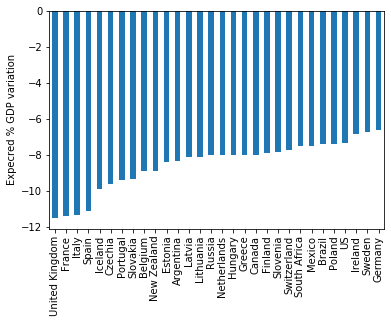

In [7]:
df_gdp.head(30)['Value'].plot(kind='bar')
plt.ylabel('Expecred % GDP variation')
plt.show()

df_finale=df_gdp.join(df_complete,on=df_gdp.index)

In [8]:
# combined Data Frame

df_fin2=df_finale[['Value','Deaths_per_million']]
#df_fin2.dropna(inplace=True)

var1_gdp=(df_fin2['Value']-df_fin2['Value'].mean())/df_fin2['Value'].std()
var2_deaths=(df_fin2['Deaths_per_million']-df_fin2['Deaths_per_million'].mean())/df_fin2['Deaths_per_million'].std()

df_fin2['Punteggio']=(var2_deaths-var1_gdp)
df_fin2.columns=['Value_GDP','Deaths_per_million','Score']

df_fin2.sort_values(by='Score',ascending=False).head(10)

<ipython-input-8-548bc5f08e26>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin2['Punteggio']=(var2_deaths-var1_gdp)


,Value_GDP,Deaths_per_million,Score
United Kingdom,-11.5,630.967742,4.245832
Belgium,-8.9,843.193717,4.133892
Italy,-11.3,569.996687,3.855418
Spain,-11.1,578.099702,3.806194
France,-11.4,441.110614,3.263410
Sweden,-6.7,482.795699,1.371976
Netherlands,-8.0,352.372685,1.307866
Portugal,-9.4,148.054475,0.923376
US,-7.3,306.185864,0.767357
Ireland,-6.8,348.775510,0.754608


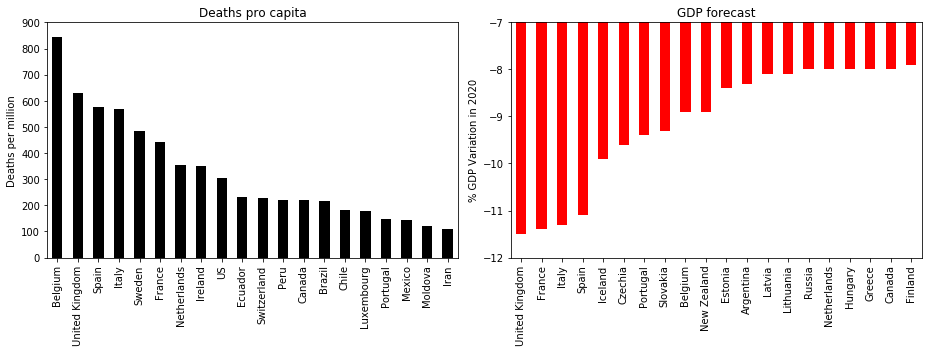

In [9]:
### final plot

fig, axes = plt.subplots(figsize=(13,5),nrows=1, ncols=2)
ax1=plt.subplot(1,2,1)
df_complete['Deaths_per_million'].head(20).plot(ax=ax1,kind='bar',color='black')
plt.xlabel('')
plt.ylim(0,900)
plt.ylabel('Deaths per million')
plt.title('Deaths pro capita')
ax2=plt.subplot(1,2,2)
df_gdp.head(20)['Value'].plot(kind='bar',ax=ax2,color='red')
plt.title('GDP forecast')
plt.ylabel('% GDP Variation in 2020')
plt.ylim(-12,-7)
plt.tight_layout()
plt.savefig('output/deaths_gdp.png',dpi=300)

## Machine Learning section

In [10]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
# input data
X=np.array(df_fin2.iloc[:,[1,0]])

# standardize data
scaler=StandardScaler()
X_std=scaler.fit_transform(X) 

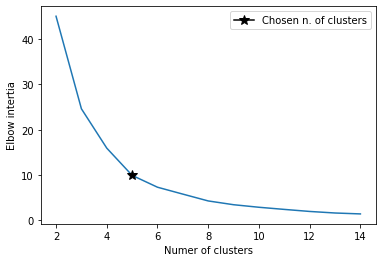

In [12]:
# Elbow plot

elbow=[]

for clu in range(2,15):
    kmeans=KMeans(n_clusters=clu,random_state=32)
    kmeans.fit(X_std)
    elbow.append([clu,kmeans.inertia_])
    
elbow=np.array(elbow)

plt.plot(elbow[:,0],elbow[:,1])
plt.xlabel('Numer of clusters')
plt.ylabel('Elbow intertia')
plt.plot(5,10,marker='*',color='black',markersize=11,label='Chosen n. of clusters')
plt.legend()
plt.savefig('output/elbow_plot.png',dpi=300)
plt.show()

In [13]:
# defining KMeans with 5 clusters
kmeans=KMeans(n_clusters=5,random_state=32)
kmeans.fit(X_std)
kmeans.predict(X_std)


array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 3, 0, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2,
       2], dtype=int32)

In [14]:
# define a function to plot data using plt.pcolor

def kmeans_pred(XX,YY):
    
    newvec=np.empty([XX.shape[0],XX.shape[1]])
    print(newvec.shape)
    
    for i in range(XX.shape[0]):
        for j in range(XX.shape[1]):
            elemento=np.array([XX[i,j],YY[i,j]]).reshape(1,-1)
            elemento_std=scaler.transform(elemento)
            newvec[i,j]=kmeans.predict(elemento_std)
        
    return newvec

u=np.arange(0,1000,10)
v=np.arange(-15,0,0.1)

XX,YY=np.meshgrid(u,v)

ZZ=kmeans_pred(XX,YY)

(150, 100)


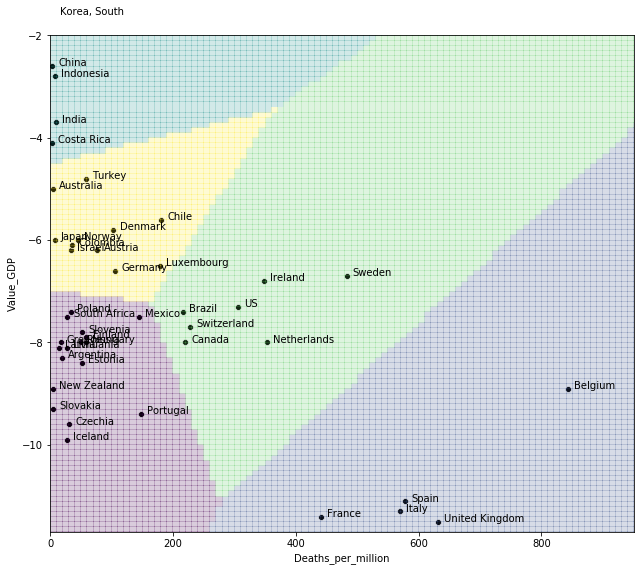

In [15]:
# plot data

x1=np.array(df_fin2['Deaths_per_million'])    
x2=np.array(df_fin2['Value_GDP'])

plt.figure(figsize=(9,8))
sns.scatterplot(x='Deaths_per_million',y='Value_GDP',data=df_fin2,color='black')

plt.xlim(0,950)
plt.ylim(-11.7,-2)
for i in range(len(x1)):
    plt.text(x1[i]+10,x2[i],df_fin2.index[i],fontsize=10)
    #plt.annotate(s=df_fin2.index[i],xy=(x1[i],x2[i]),xytext=(x1[i]+20,x2[i]),fontsize=10,arrowprops={'arrowstyle':'->'})
plt.pcolor(XX,YY,ZZ,alpha=0.2)
#cbar=plt.colorbar()
#cbar.set_label('Level of risk')
plt.tight_layout()
plt.savefig('output/kmeans_3cluster.png',dpi=300)
plt.show()

### DBscan

In [107]:
eu = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", 
     "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", 
      "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", 
     "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", 
     "Slovenia", "Spain", "Sweden", "United Kingdom", "Island", "Switzerland", "Norway"]

In [108]:
from sklearn.cluster import DBSCAN

## casi per milione e tasso deceduti/guariti

In [109]:
# casi totali
df_casi=df_confirmed.iloc[:,[1,-1]]
df_casi.columns=['Nome','Totale_casi']
df_casi=df_casi.groupby('Nome').sum()

# deceduti
df_deceduti=df_deaths.iloc[:,[1,-1]]
df_deceduti.columns=['Nome','Totale_deceduti']
df_deceduti=df_deceduti.groupby('Nome').sum()

# guariti
df_guariti=df_recovered.iloc[:,[1,-1]]
df_guariti.columns=['Nome','Totale_guariti']
df_guariti=df_guariti.groupby('Nome').sum()

df_casicompleto=df_casi.join(df_deceduti,on=df_casi.index).join(df_guariti,on=df_casi.index)

# data frame completo
df_casicompleto

,Totale_casi,Totale_deceduti,Totale_guariti
Nome,,,
Afghanistan,26310,491,5508
Albania,1672,37,1064
Algeria,11147,788,7842
Andorra,854,52,789
Angola,148,6,64
...,...,...,...
West Bank and Gaza,514,3,415
Western Sahara,9,1,8
Yemen,885,214,91


In [110]:
# unisco al precedente DataFrame le informazioni sulla popolazione e le previsioni sul GDP

df_casimillion=df_casicompleto.join(df_population,on=df_casi.index)
df_casipopgdp=df_gdp.join(df_casimillion,on=df_gdp.index)

df_casipopgdp.columns=['GDP','Totale_casi','Totale_deceduti','Totale_guariti','Popolazione']
df_casipopgdp['Casi/milione']=df_casipopgdp['Totale_casi']/df_casipopgdp['Popolazione']*10**6
df_casipopgdp['Deceduti/Guariti %']=df_casipopgdp['Totale_deceduti']/df_casipopgdp['Totale_guariti']*100
df_casipopgdp['Deceduti/milione']=df_casipopgdp['Totale_deceduti']/df_casipopgdp['Popolazione']*10**6

# questo è il DataFrame completo
df_casipopgdp.to_csv('output/df_completo.csv')

df_casipopgdp

,GDP,Totale_casi,Totale_deceduti,Totale_guariti,Popolazione,Casi/milione,Deceduti/Guariti %,Deceduti/milione
United Kingdom,-11.5,299600,42054,1293,6.665000e+07,4495.123781,3252.436195,630.967742
France,-11.4,194347,29550,73459,6.699000e+07,2901.134498,40.226521,441.110614
Italy,-11.3,237500,34405,178526,6.036000e+07,3934.724983,19.271703,569.996687
Spain,-11.1,244328,27136,150376,4.694000e+07,5205.112910,18.045433,578.099702
Iceland,-9.9,1812,10,1796,3.641340e+05,4976.190084,0.556793,27.462418
Czechia,-9.6,10111,331,7358,1.069000e+07,945.837231,4.498505,30.963517
Portugal,-9.4,37336,1522,23212,1.028000e+07,3631.906615,6.556953,148.054475
Slovakia,-9.3,1552,28,1426,5.458000e+06,284.353243,1.963534,5.130084
Belgium,-8.9,60155,9663,16625,1.146000e+07,5249.127400,58.123308,843.193717
New Zealand,-8.9,1506,22,1482,4.886000e+06,308.227589,1.484480,4.502661


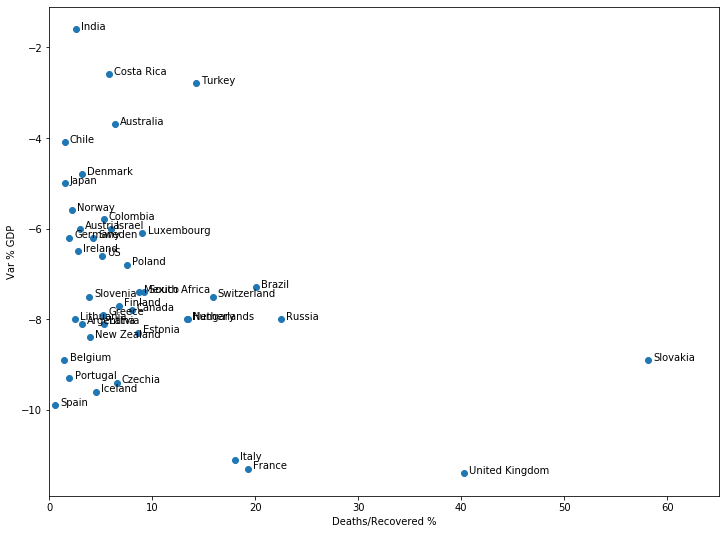

In [111]:
x1=np.array(df_casipopgdp['Deceduti/Guariti %'].drop(['United Kingdom','Netherlands','Sweden']))    
x2=np.array(df_casipopgdp['GDP'].drop(['United Kingdom','Netherlands','Sweden']))

plt.figure(figsize=(12,9))
plt.scatter(df_casipopgdp['Deceduti/Guariti %'].drop(['United Kingdom','Netherlands','Sweden']),df_casipopgdp['GDP'].drop(['United Kingdom','Netherlands','Sweden']))
plt.xlabel('Deaths/Recovered %')
plt.ylabel('Var % GDP')
for i in range(len(x1)):
    plt.text(x1[i]+0.5,x2[i],df_fin2.index[i],fontsize=10)
plt.xlim(0,65)
plt.savefig('output/deaths_recovered.png',dpi=300)
plt.show()

## 1 - Deceduti per milione

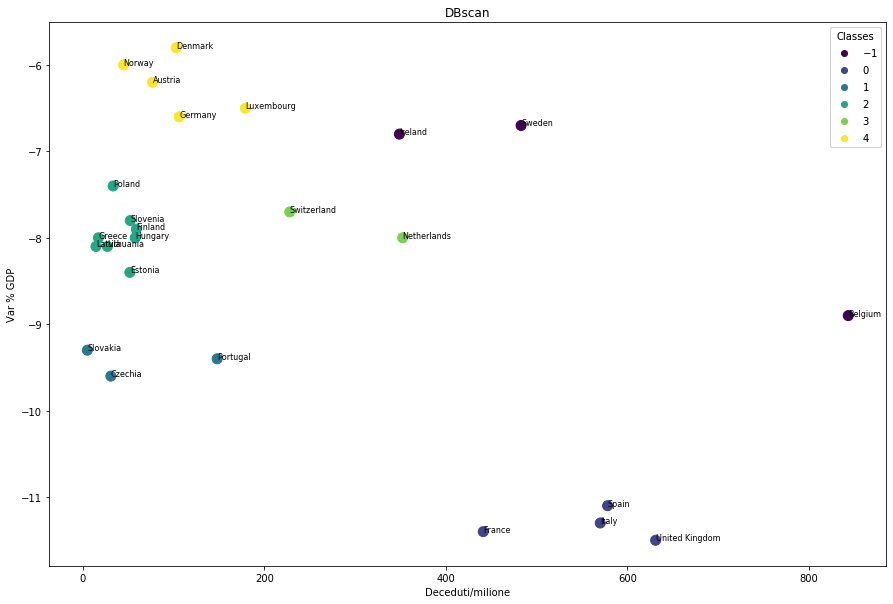

In [134]:
var = "Deceduti/milione"

df_casipopgdp['country'] = df_casipopgdp.index
df_eu = df_casipopgdp[df_casipopgdp['country'].isin(eu)]
# input data
df_eu
X=np.array(df_eu[[var, 'GDP']])
scaler=StandardScaler()
X_std=scaler.fit_transform(X) 

clustering = DBSCAN(eps=0.56, min_samples=2).fit(X_std)

c = clustering.labels_

fig, ax = plt.subplots(figsize=(15,10))
x1=np.array(df_eu[var])    
x2=np.array(df_eu['GDP'])
scatter = ax.scatter(X[:, 0], X[:, 1], c=c, s=100)
for i in range(len(x1)):
    plt.text(x1[i],x2[i],df_eu.index[i],fontsize=8)
    
plt.title("DBscan")
plt.ylabel('Var % GDP')
plt.xlabel(var)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)

In [135]:

#export for visualization

df_eu['cluster'] = c + 1
df_eu['cluster'][df_eu['cluster'] == 0] = "Nessun cluster"
df_eu['cluster'][df_eu['cluster'] == 1] = "Cluster 1"
df_eu['cluster'][df_eu['cluster'] == 2] = "Cluster 2"
df_eu['cluster'][df_eu['cluster'] == 3] = "Cluster 3"
df_eu['cluster'][df_eu['cluster'] == 4] = "Cluster 4"
df_eu['cluster'][df_eu['cluster'] == 5] = "Cluster 5"


df_eu.to_csv("output/cluster_1_deceduti_milione.csv")

<ipython-input-135-c2518469850e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu['cluster'] = c + 1
<ipython-input-135-c2518469850e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu['cluster'][df_eu['cluster'] == 0] = "Nessun cluster"
/Users/vincenzonardelli/anaconda3/envs/covstat/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

## 2 - Deceduti/Guariti %

/Users/vincenzonardelli/anaconda3/envs/covstat/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


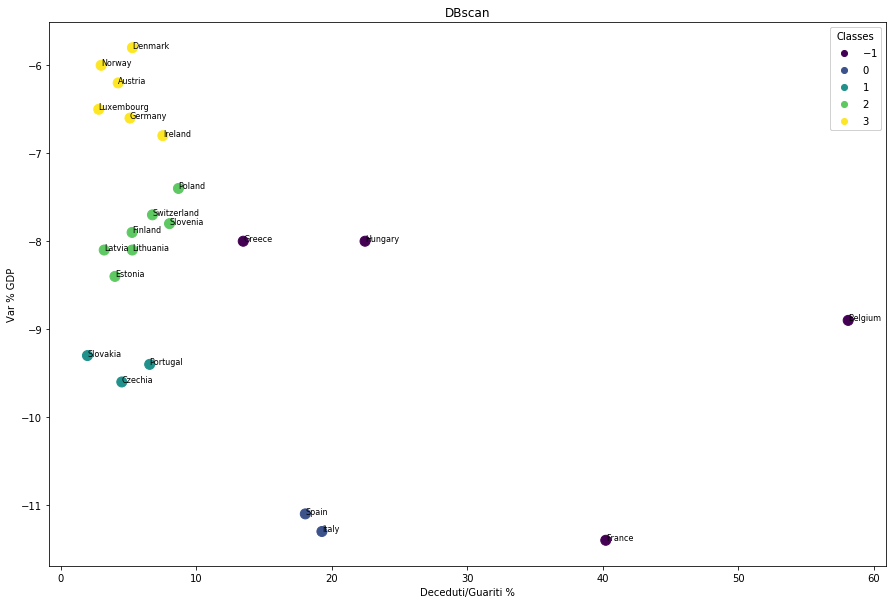

In [142]:
var = "Deceduti/Guariti %"

df_casipopgdp['country'] = df_casipopgdp.index
df_eu = df_casipopgdp[df_casipopgdp['country'].isin(eu)]
df_eu.drop(['United Kingdom','Netherlands','Sweden'], inplace = True)
# input data
df_eu
X=np.array(df_eu[[var, 'GDP']])
scaler=StandardScaler()
X_std=scaler.fit_transform(X) 

clustering = DBSCAN(eps=0.38, min_samples=2).fit(X_std)

c = clustering.labels_

fig, ax = plt.subplots(figsize=(15,10))
x1=np.array(df_eu[var])    
x2=np.array(df_eu['GDP'])
scatter = ax.scatter(X[:, 0], X[:, 1], c=c, s=100)
for i in range(len(x1)):
    plt.text(x1[i],x2[i],df_eu.index[i],fontsize=8)
    
plt.title("DBscan")
plt.ylabel('Var % GDP')
plt.xlabel(var)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)

In [143]:

#export for visualization

df_eu['cluster'] = c + 1
df_eu['cluster'][df_eu['cluster'] == 0] = "Nessun cluster"
df_eu['cluster'][df_eu['cluster'] == 1] = "Cluster 1"
df_eu['cluster'][df_eu['cluster'] == 2] = "Cluster 2"
df_eu['cluster'][df_eu['cluster'] == 3] = "Cluster 3"
df_eu['cluster'][df_eu['cluster'] == 4] = "Cluster 4"
df_eu['cluster'][df_eu['cluster'] == 5] = "Cluster 5"


df_eu.to_csv("output/cluster_2_deceduti_guariti.csv")

<ipython-input-143-c224e205e5f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu['cluster'] = c + 1
<ipython-input-143-c224e205e5f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu['cluster'][df_eu['cluster'] == 0] = "Nessun cluster"
/Users/vincenzonardelli/anaconda3/envs/covstat/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

## Casi per milione

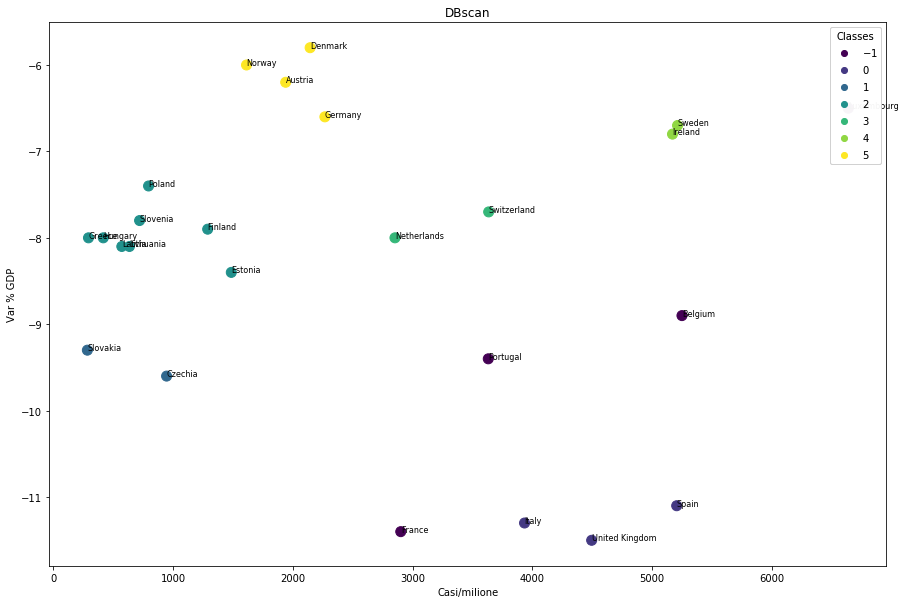

In [145]:
var = "Casi/milione"

df_casipopgdp['country'] = df_casipopgdp.index
df_eu = df_casipopgdp[df_casipopgdp['country'].isin(eu)]
# input data
df_eu
X=np.array(df_eu[[var, 'GDP']])
scaler=StandardScaler()
X_std=scaler.fit_transform(X) 

clustering = DBSCAN(eps=0.5, min_samples=2).fit(X_std)

c = clustering.labels_

fig, ax = plt.subplots(figsize=(15,10))
x1=np.array(df_eu[var])    
x2=np.array(df_eu['GDP'])
scatter = ax.scatter(X[:, 0], X[:, 1], c=c, s=100)
for i in range(len(x1)):
    plt.text(x1[i],x2[i],df_eu.index[i],fontsize=8)
    
plt.title("DBscan")
plt.ylabel('Var % GDP')
plt.xlabel(var)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)

In [146]:

#export for visualization

df_eu['cluster'] = c + 1
df_eu['cluster'][df_eu['cluster'] == 0] = "Nessun cluster"
df_eu['cluster'][df_eu['cluster'] == 1] = "Cluster 1"
df_eu['cluster'][df_eu['cluster'] == 2] = "Cluster 2"
df_eu['cluster'][df_eu['cluster'] == 3] = "Cluster 3"
df_eu['cluster'][df_eu['cluster'] == 4] = "Cluster 4"
df_eu['cluster'][df_eu['cluster'] == 5] = "Cluster 5"


df_eu.to_csv("output/cluster_3_casi_milione.csv")

<ipython-input-146-44b3f62f583a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu['cluster'] = c + 1
<ipython-input-146-44b3f62f583a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu['cluster'][df_eu['cluster'] == 0] = "Nessun cluster"
/Users/vincenzonardelli/anaconda3/envs/covstat/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-